<h1 style="text-align: center; vertical-align: middle;">Numerical Methods in Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Python examples -- Week 2</h2>

<h2>Run this first!</h2>

Imports and modules:

In [1]:
from config2 import *
%matplotlib inline

<h3>Pendulum parameters, Hamiltonian</h3>

In [2]:
m = 1 # point mass
g = 1 # magnitude of the gravitational field
L = 1 # length of the rod

In [3]:
### Values of hamiltonian for comparison with theory
TH, PP = np.meshgrid(np.linspace(-np.pi * 1.1, np.pi * 1.1, 100), 
                     np.linspace(-3, 3, 100))

HH = hamiltonian(TH, PP)

<h3>Euler-Cromer Method (slide 10)</h3>

In [4]:
def solve_eulercromer(theta, p, dt=0.1):
    ### from Euler:
    theta_next = theta + dt * p / (m * L*L)
    p_next = p - dt * m * g * L * np.sin(theta_next)
    return (theta_next, p_next)

In [5]:
### Initial values:
theta_ini = -1.1
p_ini = 0
n_steps = 100

In [6]:
results_eulercromer = np.zeros((n_steps, 2), dtype=np.float32)
results_eulercromer[0] = (theta_ini, p_ini)

for k in range(1, n_steps):
    results_eulercromer[k] = solve_eulercromer(*results_eulercromer[k - 1])

In [7]:
### Explicit Euler for comparison:
results_euler = np.zeros((n_steps, 2), dtype=np.float32) # for comparison
results_euler[0] = (theta_ini, p_ini)

for k in range(1, n_steps):
    results_euler[k] = solve_euler(*results_euler[k - 1])

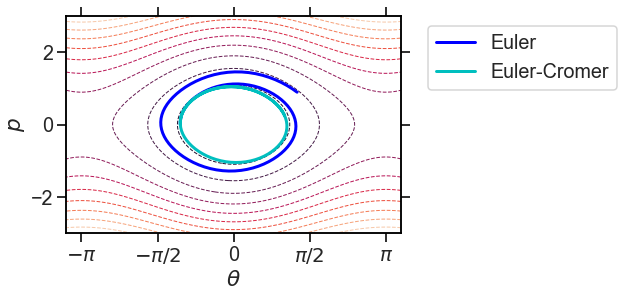

In [8]:
plt.contour(TH, PP, HH, levels=10, linestyles='--', linewidths=1)

plt.plot(results_euler[:, 0], results_euler[:, 1], c='b', label='Euler')
plt.plot(results_eulercromer[:, 0], results_eulercromer[:, 1], c='c', label='Euler-Cromer')

plt.legend(bbox_to_anchor=(1.05, 1))
set_axes()

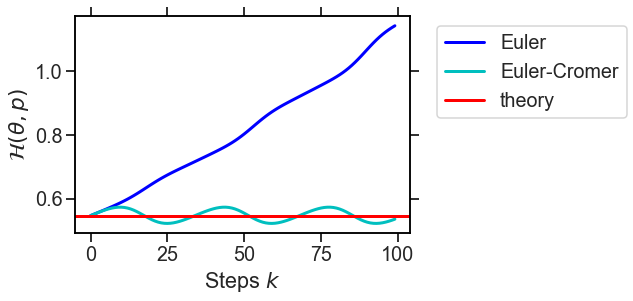

In [9]:
plt.plot(
    hamiltonian(results_euler[:, 0], results_euler[:, 1]), 
    c='b', label='Euler')
plt.plot(
    hamiltonian(results_eulercromer[:, 0], results_eulercromer[:, 1]), 
    c='c', label='Euler-Cromer')
plt.axhline(hamiltonian(theta_ini, p_ini), c='r', label='theory')

plt.xlabel('Steps $k$')
plt.ylabel(r'$\mathcal{H}(\theta, p)$')
plt.legend(bbox_to_anchor=(1.05, 1));

<h3>Leapfrog Method (slide 12)</h3>

In [10]:
def solve_leapfrog(theta, p, dt=0.1):
    theta_half = theta + dt / 2 * p / (m * L*L)
    p_next = p - dt * m * g * L * np.sin(theta_half)
    theta_next = theta_half + dt / 2 * p_next / (m * L*L)
    return (theta_next, p_next)

In [11]:
results_leapfrog = np.zeros((n_steps, 2), dtype=np.float32)
results_leapfrog[0] = (theta_ini, p_ini)

for k in range(1, n_steps):
    results_leapfrog[k] = solve_leapfrog(*results_leapfrog[k - 1])

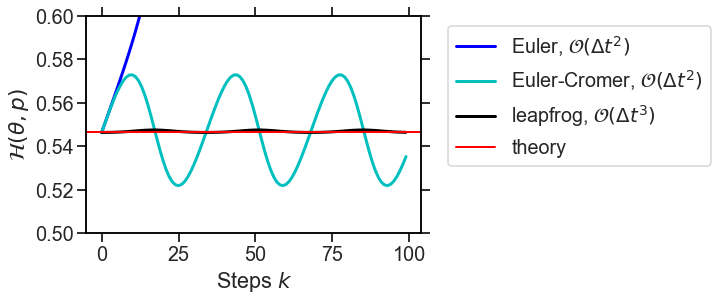

In [12]:
plt.plot(
    hamiltonian(results_euler[:, 0], results_euler[:, 1]), 
    c='b', label='Euler, $\mathcal{O}(\Delta t^2)$')
plt.plot(
    hamiltonian(results_eulercromer[:, 0], results_eulercromer[:, 1]), 
    c='c', label='Euler-Cromer, $\mathcal{O}(\Delta t^2)$')
plt.plot(
    hamiltonian(results_leapfrog[:, 0], results_leapfrog[:, 1]), 
    c='k', label='leapfrog, $\mathcal{O}(\Delta t^3)$')
plt.axhline(hamiltonian(theta_ini, p_ini), c='r', lw=2, label='theory')

plt.ylim(0.5, 0.6)
plt.xlabel('Steps $k$')
plt.ylabel(r'$\mathcal{H}(\theta, p)$')
plt.legend(bbox_to_anchor=(1.05, 1));